### **Вариант 17**

In [ ]:
import numpy as np


from sklearn.svm import SVR,SVC,LinearSVC,LinearSVR
from sklearn.linear_model import Lasso,Ridge,LinearRegression,LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_classification,make_regression


In [ ]:
samples = 70
features = 5


X = make_regression(n_samples=samples, n_features=features,
                    n_informative=np.random.randint(1,features+1),
                    n_targets=0)[0]

a = np.random.rand(features)+np.random.randint(-20,20,size = features)
b = np.random.rand()+np.random.randint(-20,20)
m,s = 0,3
c = np.sqrt(s)
noise = np.random.normal(loc = m,scale = c,size = X.shape[0])

y = np.logical_and(X@a + b + noise > 0, 1).astype(int)

In [ ]:
def svm_classification(x,y,alpha = 1):
    model = LinearSVC(C=alpha,dual = True,max_iter=10000)
    model.fit(x,y)
    
    #print(accuracy_score(y,model.predict(x)))
    return {'a':model.coef_,'b':model.intercept_[0],'model':model}
    
print('Результат работы SVC:',svm_classification(X,y))
print(f'Изначальные коэффициенты:\na = {a};\nb = {b};\nc = {c}')

Результат работы SVC: {'a': array([[ 0.69119762,  0.13806501,  0.88062949,  1.42850787, -1.6247226 ]]), 'b': 0.5020762255315909, 'model': LinearSVC(C=1, max_iter=10000)}
Изначальные коэффициенты:
a = [  9.06764217   4.40423481   8.08658804  14.26212485 -18.09658253];
b = 8.557260091563704;
c = 1.7320508075688772


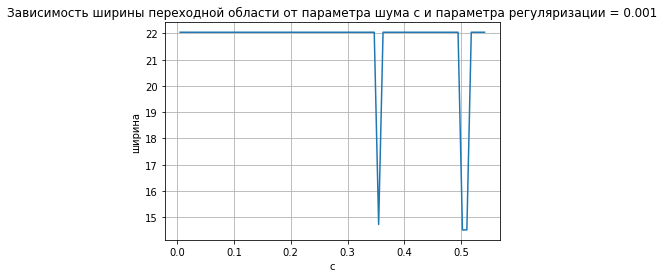

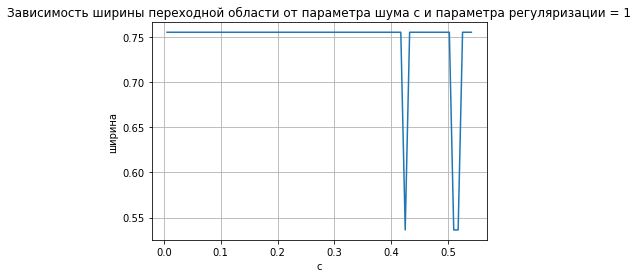

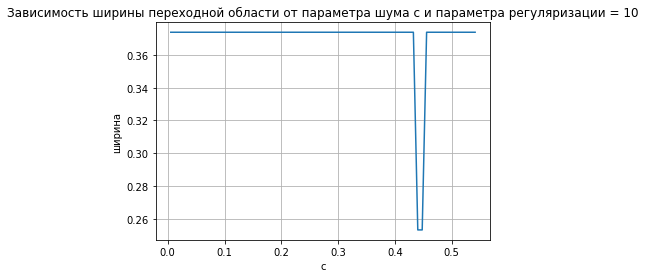

In [ ]:
samples = 70
features = 5


X = make_regression(n_samples=samples, n_features=features,
                    n_informative=np.random.randint(1,features+1),
                    n_targets=0)[0]

a = np.random.rand(features)+np.random.randint(-20,20,size = features)
b = np.random.rand()+np.random.randint(-20,20)
m,s = 0,3
c = np.sqrt(s)
noise = np.random.normal(loc = m,scale = c,size = X.shape[0])

y = np.logical_and(X@a + b + noise > 0, 1).astype(int)


c = np.linspace(0.001*(X.max() - X.min()),0.1*(X.max()-X.min()),70)
for C in [0.001,1,10]:

    y_noise = [np.logical_and(X@a + b + np.random.normal(loc = m,scale = k,size = X.shape[0]) > 0, 1).astype(int) for k in c]
    distance = [2/np.linalg.norm(svm_classification(X,y + y_noise[i],alpha = C)['a']) for i in range(X.shape[0]) ]
    plt.plot(c,distance)
    plt.grid()
    plt.title(f'Зависимость ширины переходной области от параметра шума с и параметра регуляризации = {C}')
    plt.xlabel('c')
    plt.ylabel('ширина')
    plt.show()
    